#### The computer scientist Yann LeCun famously said that 
```
“if intelligence was a cake, unsupervised learning would be the cake, supervised learning would be the icing on the cake, and reinforcement learning would be the cherry on the cake.”
```

###  Few Applications of Unsupervised Learning
* #### Clustering
```
    The goal is to group similar instances together into clusters. Clustering is a great
    tool for data analysis, customer segmentation, recommender systems, search
    engines, image segmentation, semi-supervised learning, dimensionality reduction, and more.
```

* #### Anomaly detection
```
    The objective is to learn what “normal” data looks like, and then use that to
    detect abnormal instances, such as defective items on a production line or a new
    trend in a time series.
```

* #### Density estimation
```
    This is the task of estimating the probability density function (PDF) of the random
    process that generated the dataset. Density estimation is commonly used for
    anomaly detection: instances located in very low-density regions are likely to be
    anomalies. It is also useful for data analysis and visualization.
```

## Clustering


#### Applications of Clustering -
- customer segmentation
- data analysis
- dimensionality reduction technique
- anomaly detection (also called outlier detection)
- semi-supervised learning (only few labels are present)
- search engines
- segment an image (object detection & tracking)

#### Demerits of Clustering
- It is not fast nor scalable, reiterating data to get optimal soln
- It needs to specify n_clusters or no. of cluster
- It is dependent on data geometry, even if inertia is lower, model is worse due to shape mismatch
* 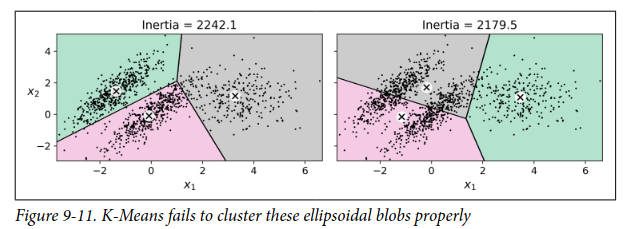

```
Computational COmplexity of K-Means Algo depends if data has clustering structure.
Clustering structure? Linear Complexity if not, Exponential Complexity
In practice, this rarely happens, and K-Means is generally one of the fastest clustering algorithms.
```
---

## Choosing Wrong Dataset

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

df = pd.read_csv('customer_data.csv')

df.head()

df.reset_index(drop=True,inplace=True)

### Customer Segmentation, using all features

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

labels = kmeans.labels_
labels

y_kmeans = kmeans.fit_predict(X)
y_kmeans is kmeans.labels_

In [34]:
# Center points are not distinct enough
kmeans.cluster_centers_

array([[1.88372093e+00, 2.50000000e+00, 4.55606977e+03, 1.10055000e+04,
        1.74618721e+04, 1.38846512e+03, 7.55961628e+03, 1.53108140e+03],
       [1.21698113e+00, 2.59433962e+00, 2.37108491e+04, 3.88205660e+03,
        5.16931132e+03, 3.77244340e+03, 1.11826415e+03, 1.69310377e+03],
       [2.00000000e+00, 2.50000000e+00, 1.81924000e+04, 3.53616000e+04,
        4.80522000e+04, 3.30840000e+03, 2.35349000e+04, 4.46110000e+03],
       [1.00000000e+00, 2.46153846e+00, 5.64533077e+04, 1.00262308e+04,
        8.73900000e+03, 1.55180769e+04, 1.25823077e+03, 7.17053846e+03],
       [1.14666667e+00, 2.54222222e+00, 6.48507556e+03, 3.14857333e+03,
        3.79895556e+03, 2.65575111e+03, 1.09994667e+03, 9.86546667e+02]])

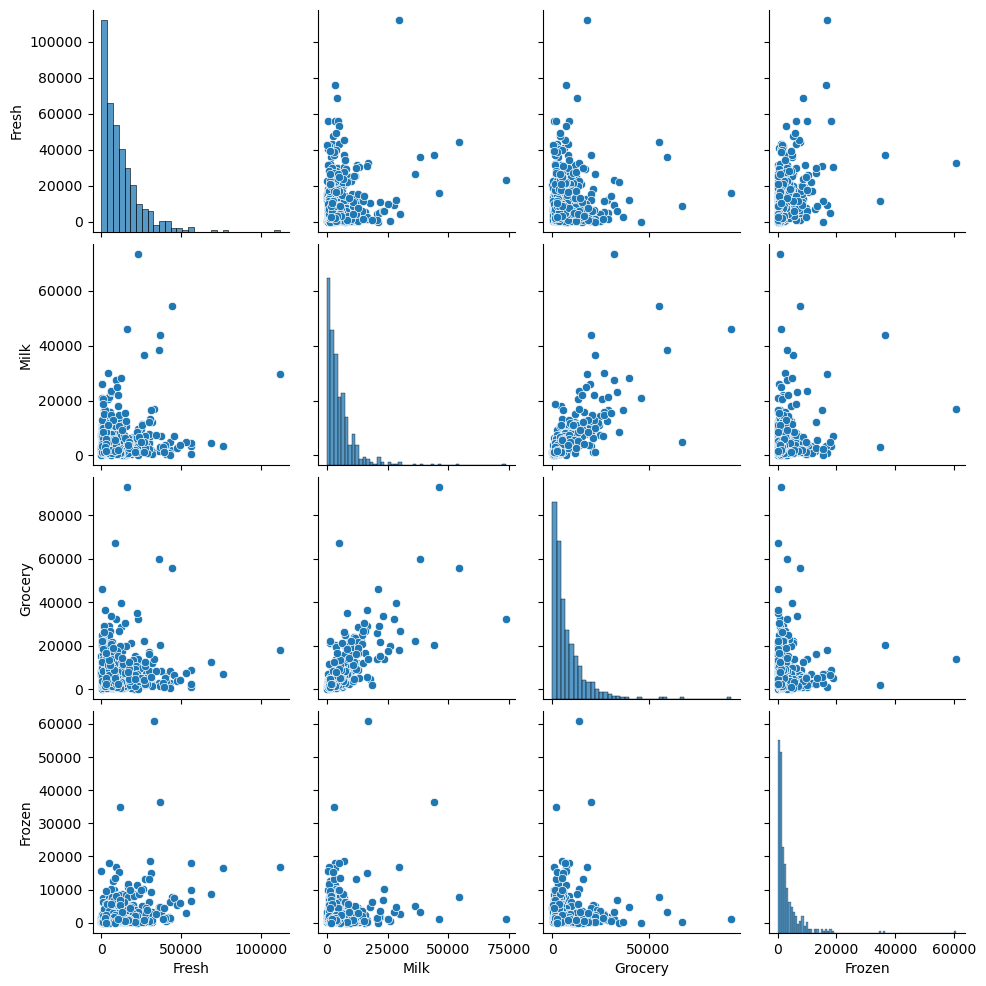

In [71]:
cols = ["Fresh", "Milk", "Grocery", "Frozen"]
sns.pairplot(df[cols])
plt.show()


### Using Elbow Method to find optimal n_clusters

In [48]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Log-transform to reduce skew (add 1 to avoid log(0))
X_log = np.log1p(X)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_log)


<function matplotlib.pyplot.show(close=None, block=None)>

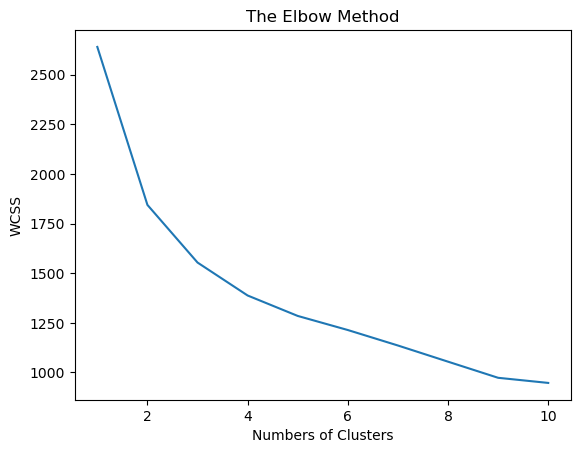

In [49]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# X = df.drop(columns=["Channel", "Region"]).values 
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters= i, init= 'k-means++', random_state= 42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11) , wcss)
plt.title('The Elbow Method')
plt.xlabel('Numbers of Clusters')
plt.ylabel('WCSS')
plt.show

#### WCSS dropping slowly or Sloppy Elbow

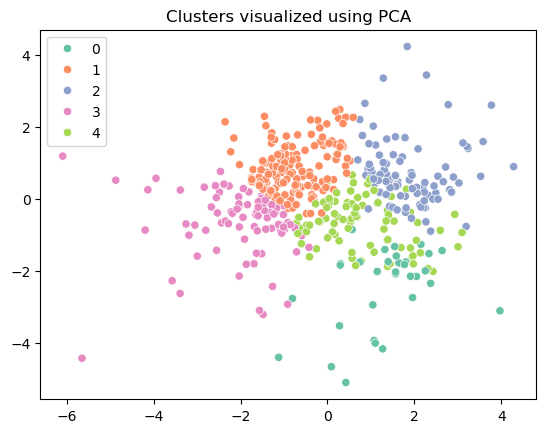

In [51]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans.labels_, palette='Set2')
plt.title("Clusters visualized using PCA")
plt.show()


### All points near origin or skewed, even after scaling

In [72]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
score = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", score)


Silhouette Score: 0.19165609775268222


### Silhouette Score < 0.2
```
Ranges from -1 to 1.
    > 0.5 → clear clusters.
    ~ 0.2-0.4 → overlapping.
    < 0 → terrible clustering.
```
---

In [73]:
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(X_scaled, kmeans.labels_)
print("DB Index:", score)  # Lower is better


DB Index: 1.5334619900175965


### No Idea, more research required

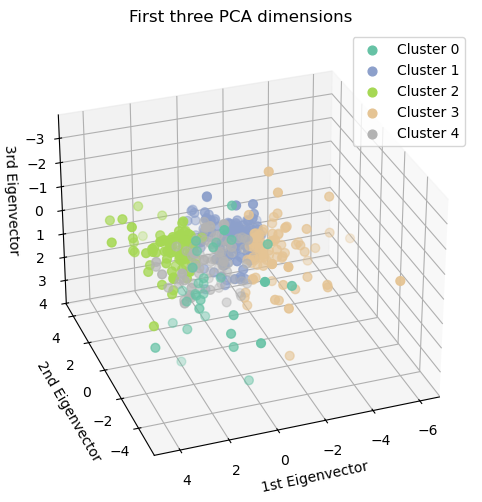

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Ensure 3D plotting is enabled
import numpy as np

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

pca = PCA(n_components=3).fit_transform(X_scaled)
labels = kmeans.labels_
unique_labels = np.unique(labels)
colors = plt.cm.Set2(np.linspace(0, 1, len(unique_labels)))

# Plot each cluster separately to get correct legend
for i, label in enumerate(unique_labels):
    ax.scatter(
        pca[labels == label, 0],
        pca[labels == label, 1],
        pca[labels == label, 2],
        s=40,
        color=colors[i],
        label=f"Cluster {label}"
    )

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.set_ylabel("2nd Eigenvector")
ax.set_zlabel("3rd Eigenvector")

plt.legend()
plt.show()


## Importing new dataset and running some tests

In [35]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [78]:
X_scaled = df.drop(columns=['Genre','CustomerID']).values

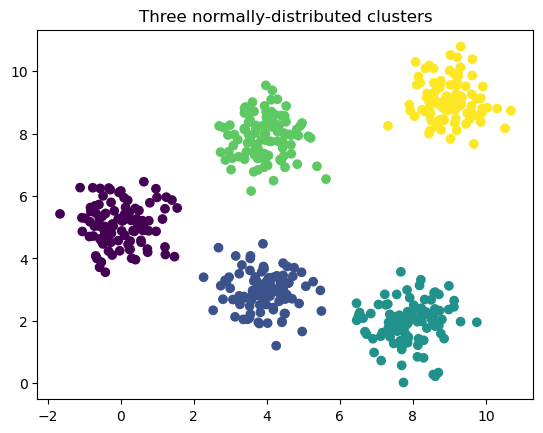

In [3]:
from sklearn.datasets import make_blobs

centers=[(0,5),(4,3),(8,2),(4,8),(9,9)]
X, y = make_blobs(n_samples=500,centers=centers, cluster_std=0.65, random_state=0,)
# print(centers)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Three normally-distributed clusters")
plt.show()

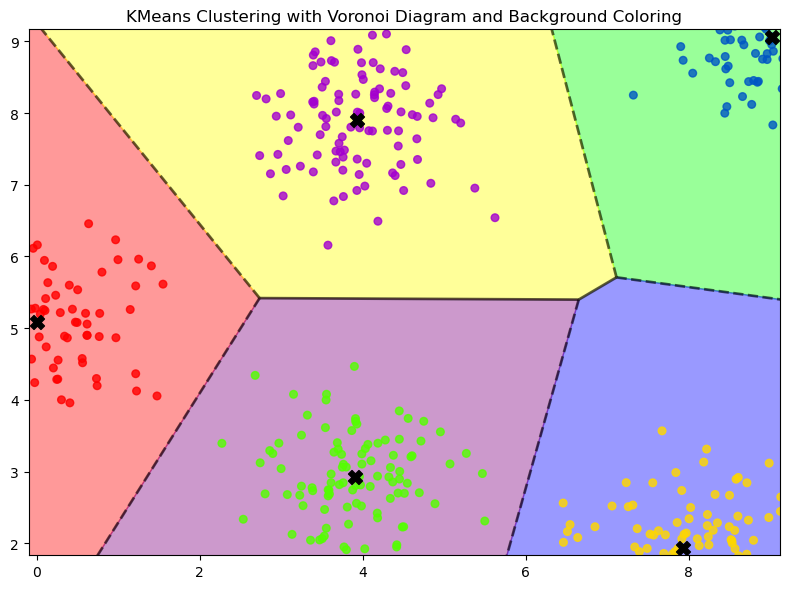

In [253]:
from scipy.spatial import Voronoi, voronoi_plot_2d

# Fit KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)
centroids = kmeans.cluster_centers_

# Create Voronoi diagram from centroids
vor = Voronoi(centroids)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot Voronoi diagram first
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='k', line_width=2, line_alpha=0.6, point_size=0)

# Fill regions after voronoi_plot_2d (to keep them on top)
colors =['#FF0000', '#00FF00', '#0000FF','#FFFF00','#800080']
# colorize
for i, region in enumerate(regions):
    polygon = vertices[region]
    plt.fill(*zip(*polygon), color=colors[i % len(colors)], alpha=0.4)

plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

# Plot data points
ax.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='prism', s=30, alpha=0.8)
ax.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='X')
ax.set_title("KMeans Clustering with Voronoi Diagram and Background Coloring")
plt.tight_layout()
plt.show()

In [4]:
from scipy.spatial import Voronoi, voronoi_plot_2d

# Fit KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)
centroids = kmeans.cluster_centers_

# Create Voronoi diagram from centroids
vor = Voronoi(centroids)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot Voronoi diagram first
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='k', line_width=2, line_alpha=0.6, point_size=0)

# Fill regions after voronoi_plot_2d (to keep them on top)
colors =['#FF0000', '#00FF00', '#0000FF','#FFFF00','#800080']
# colorize

# colorize
for i, region in enumerate(regions):
    polygon = vertices[region]
    plt.fill(*zip(*polygon), color=colors[i % len(colors)], alpha=0.4)

plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

# Plot data points
ax.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='prism', s=30, alpha=0.8)
ax.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='X')
ax.set_title("KMeans Clustering with Voronoi Diagram and Background Coloring")
plt.tight_layout()
plt.show()

NameError: name 'KMeans' is not defined

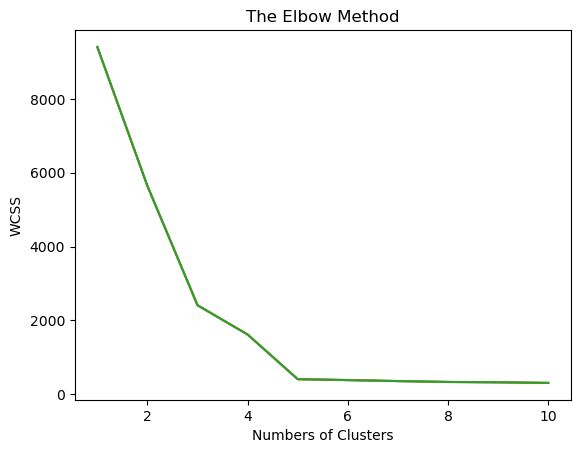

In [92]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# X = df.drop(columns=["Channel", "Region"]).values 
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters= i, init= 'k-means++', random_state= 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11) , wcss)
plt.title('The Elbow Method')
plt.xlabel('Numbers of Clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [85]:
import sklearn.datasets as datasets
n_samples=500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)


In [8]:
from sklearn.datasets import make_blobs

centers=[(0,5),(4,3),(8,2),(4,8),(9,9)]
X, y = make_blobs(n_samples=500,centers=centers, cluster_std=0.65, random_state=0,)

# Fit KMeans
good_init = np.array([[0,5],[4,3], [8,1] ,[4,8], [9,8]])
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=11)
kmeans.fit(X)
centroids = kmeans.cluster_centers_


In [9]:
kmeans.inertia_, kmeans.score(X)

(407.26217656045884, -407.2621765604587)

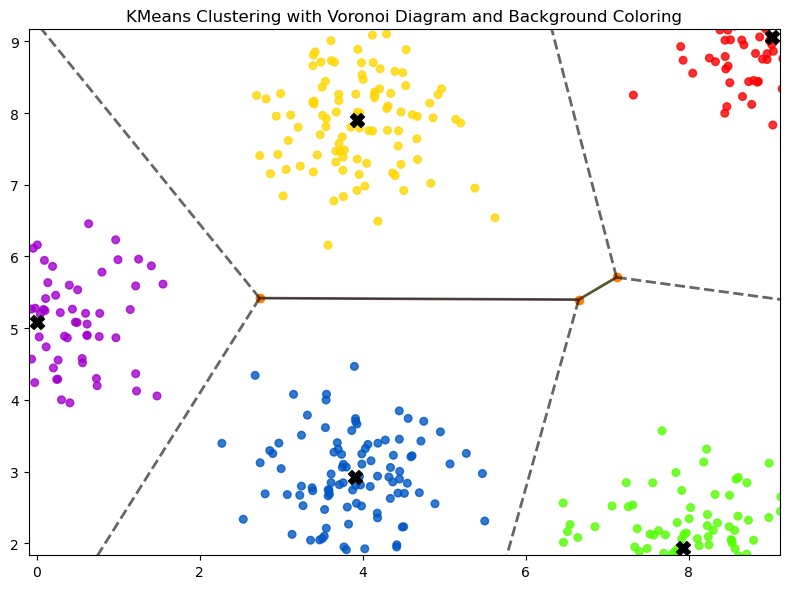

In [22]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

# Create Voronoi diagram from centroids
vor = Voronoi(centroids)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot Voronoi edges
voronoi_plot_2d(vor, ax=ax, show_vertices=True, line_colors='k', line_width=2, line_alpha=0.6, point_size=0)

# Define colors
colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#800080']

# Fill valid Voronoi regions with colors
for i, region_idx in enumerate(vor.point_region):
    ax.fill(*zip(*polygon), color=colors[i % len(colors)], alpha=0.4)
    region = vor.regions[region_idx]
    polygon = [vor.vertices[j] for j in region]

# Optional: plot centroids again
ax.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='prism', s=30, alpha=0.8)
ax.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='X')

# Limits and title
ax.set_xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
ax.set_ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)
ax.set_title("KMeans Clustering with Voronoi Diagram and Background Coloring")

plt.tight_layout()
plt.show()

In [11]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA()
X_pca = pca.fit_transform(X)

len(X_pca[:,0]), len(X_pca[:,1]),y.shape, len(kmeans.labels_)

(500, 500, (500,), 500)

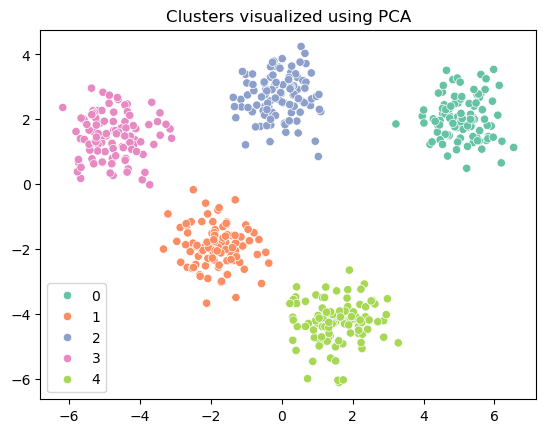

In [23]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA()
X_pca = pca.fit_transform(X)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans.labels_, palette='Set2')
plt.title("Clusters visualized using PCA")
plt.show()


### All points near origin or skewed, even after scaling

In [132]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
score = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", score)


Silhouette Score: 0.73546079253673


### Silhouette Score < 0.2
```
Ranges from -1 to 1.
    > 0.5 → clear clusters.
    ~ 0.2-0.4 → overlapping.
    < 0 → terrible clustering.
```
---

In [133]:
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(X, kmeans.labels_)
print("DB Index:", score)  # Lower is better


DB Index: 0.3538698056722778


### No Idea, more research required

[0 1 2 3 4]


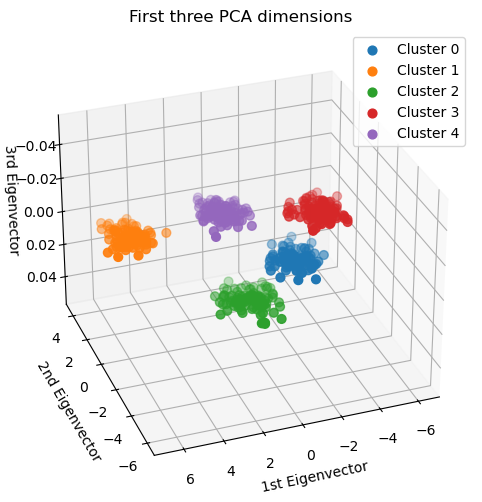

In [146]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Ensure 3D plotting is enabled
import numpy as np

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

pca = PCA().fit_transform(X)
labels = kmeans.labels_
unique_labels = np.unique(labels)
print(unique_labels) # sorry,here labels are unique values like 0,1,2,3,4

colors = plt.cm.Set2(np.linspace(0, 1, len(unique_labels)))

# Plot each cluster separately to get correct legend
for i, label in enumerate(unique_labels):
    ax.scatter(
        # here labels are used but as X axis, since we have used  2 features (X axis,Y axis)
        pca[labels == label, 0],
        pca[labels == label, 1],
        s=40,
        # color=colors[i],
        label=f"Cluster {label}"
    )

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.set_ylabel("2nd Eigenvector")
ax.set_zlabel("3rd Eigenvector")

plt.legend()
plt.show()


## Mini Batch and Silhoutte Score

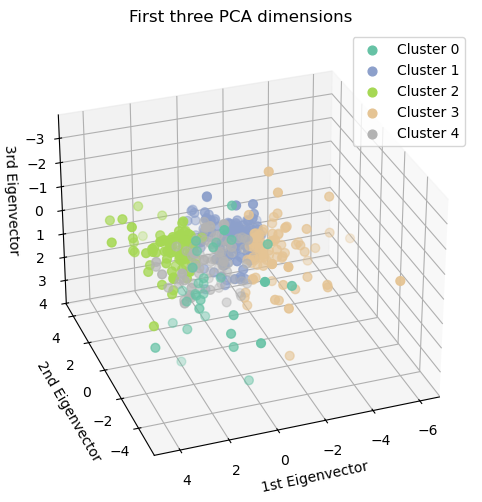

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Ensure 3D plotting is enabled
import numpy as np

X, _ = make_blobs(n_samples=5000, cluster_std=0.65, random_state=0)

kmeans = KMeans(n_clusters= i, init= 'k-means++', random_state= 42).fit(X)
print(kmeans.labels_)

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

pca = PCA().fit_transform(X)
labels = kmeans.labels_
unique_labels = np.unique(labels)
colors = plt.cm.Set2(np.linspace(0, 1, len(unique_labels)))

# Plot each cluster separately to get correct legend
for i, label in enumerate(unique_labels):
    ax.scatter(
        pca[labels == label, 0],
        pca[labels == label, 1],
        pca[labels == label, 2],
        s=40,
        color=colors[i],
        label=f"Cluster {label}"
    )

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.set_ylabel("2nd Eigenvector")
ax.set_zlabel("3rd Eigenvector")

plt.legend()
plt.show()


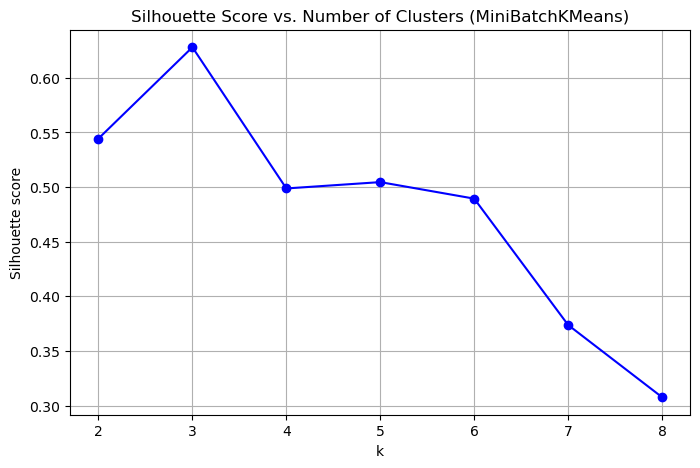

In [312]:
from sklearn.cluster import MiniBatchKMeans
# Generate sample clustered data
X, _ = make_blobs(n_samples=5000, cluster_std=0.65, random_state=0)

# Range of cluster numbers to try
k_values = range(2, 9)
silhouette_scores = []

# Compute silhouette scores for each k
for k in k_values:
    mb_kmeans = MiniBatchKMeans(n_clusters=k, random_state=0, batch_size=500)
    labels = mb_kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.title("Silhouette Score vs. Number of Clusters (MiniBatchKMeans)")
plt.grid(True)
plt.xticks(k_values)
plt.show()


### Silhoutte Graph

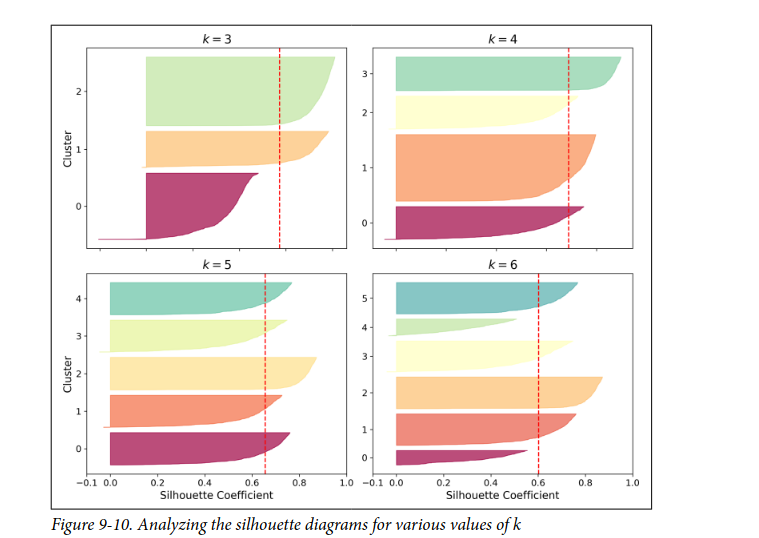
```
    k=3: One cluster has many points with low silhouette scores — possibly not a good choice.
    k=4: Slightly better, but cluster 1 (3rd from top) is too large and includes points with low silhouette scores.
    k=5: All clusters are fairly balanced, and most points have good silhouette values (> red line).
    k=6: Overall score is a bit lower than k=5, and a few clusters look less compact.
```

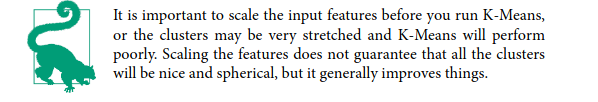

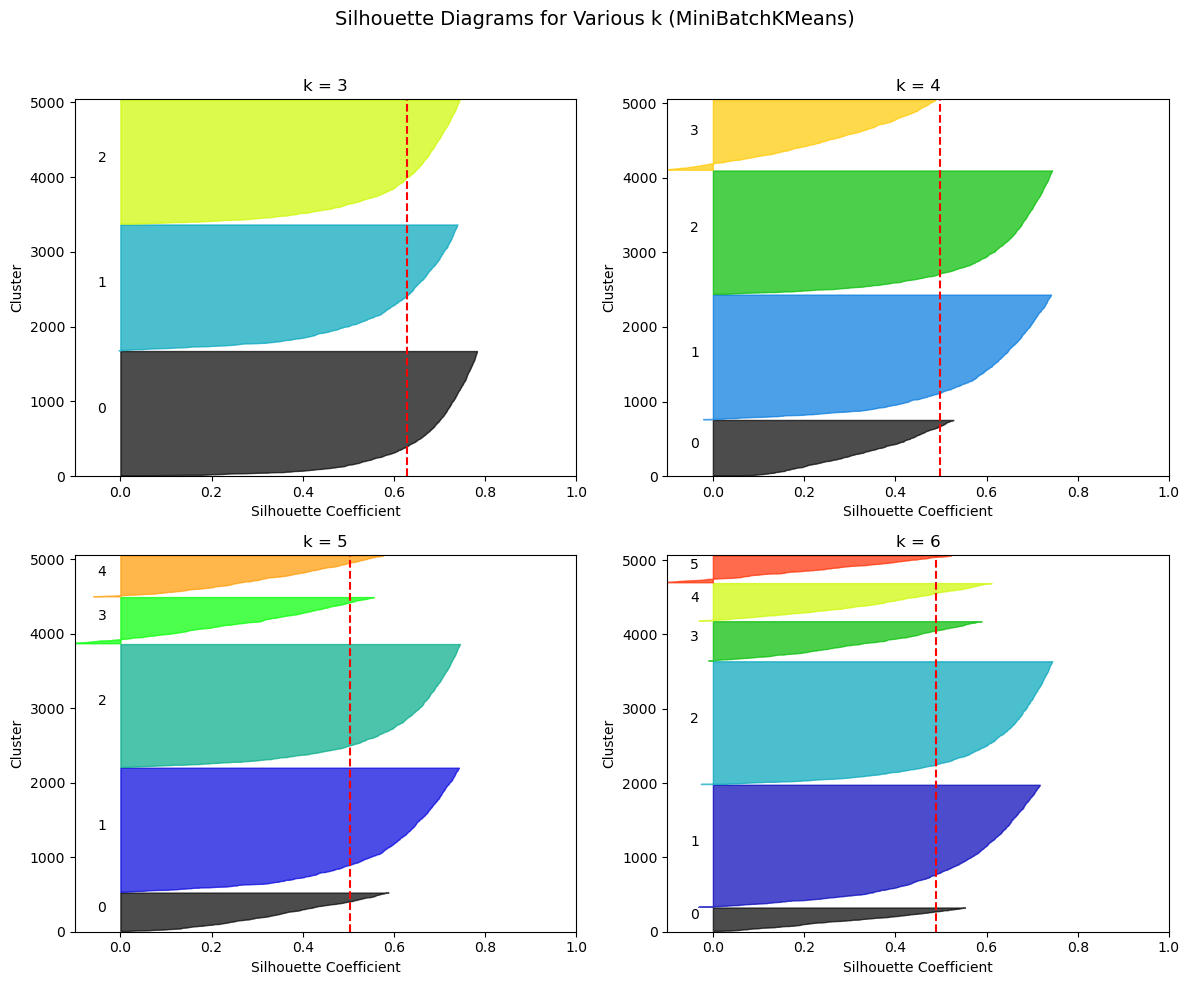

In [26]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import MiniBatchKMeans

# Generate synthetic data
X, _ = make_blobs(n_samples=5000, cluster_std=0.65, random_state=0)

# Range of cluster values
k_values = [3, 4, 5, 6]

# Set up 2x2 plot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for idx, k in enumerate(k_values):
    # Create and fit MiniBatchKMeans
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=0, batch_size=500)
    cluster_labels = kmeans.fit_predict(X)

    # Compute silhouette score and individual coefficients
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    ax = axs[idx]
    y_lower = 10

    for i in range(k):
        # Aggregate silhouette scores for cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # Add space between clusters

    ax.set_title(f"k = {k}")
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (k + 1) * 10])
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster")

plt.suptitle("Silhouette Diagrams for Various k (MiniBatchKMeans)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



## Color Segmentation (lesser verssion of CNN application of Image Segmentaion)

In [29]:
from matplotlib.image import imread
image = imread("butterfly.jpg")
image.shape

(5184, 3888, 3)

In [30]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

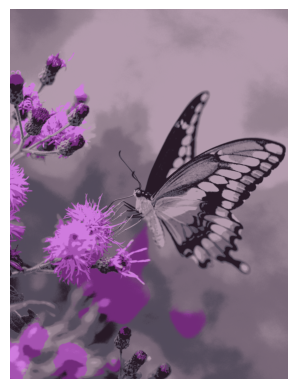

In [41]:
if segmented_img.max() > 1.0:
    segmented_img = segmented_img / 255

plt.axis('off')
plt.imshow(segmented_img)
plt.show()

## Using Clustering for Preprocessing
Clustering can be an efficient approach to dimensionality reduction, in particular as a preprocessing step before a supervised learning algorithm

In [106]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_digit, y_digit = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digit, y_digit)

log_reg = LogisticRegression(max_iter=250)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=250)

In [45]:
log_reg.score(X_test, y_test)

0.9533333333333334

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
("kmeans", KMeans(n_init='auto', n_clusters=100)),
("standardize", StandardScaler()),
("log_reg", LogisticRegression()),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=100)),
                ('standardize', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [73]:
pipeline.score(X_test, y_test)

0.9688888888888889

```
Since K-Means is just a preprocessing step in a classification pipeline, finding a good value for k is much simpler than earlier.
There’s no need to perform silhouette analysis or minimize the inertia; the best value of k is simply the one that results in the best classification performance during cross-validation.
We can use GridSearchCV to find the optimal number of clusters

In [121]:
from sklearn.model_selection import GridSearchCV


param_grid = dict(
    kmeans__n_clusters=range(20,100)
)
grid_clf = GridSearchCV(pipeline, param_grid, cv=5)
grid_clf.fit(X_train, y_train)
param_grid

{'kmeans__n_clusters': range(20, 100)}

In [122]:
grid_clf.best_params_, grid_clf.best_score_

({'kmeans__n_clusters': 83}, 0.974756987470742)

## Using Clustering for Semi-Supervised Learning
when we have plenty of unlabeled instances and very few labeled instances.

In [84]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression()

In [85]:
log_reg.score(X_test, y_test)

0.84

In [107]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

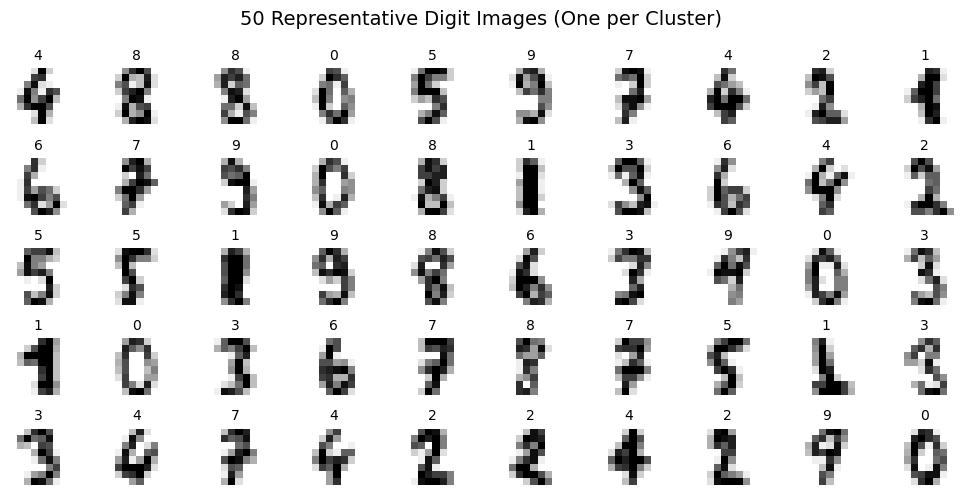

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for idx, image in enumerate(X_representative_digits):
    plt.subplot(5, 10, idx + 1)
    plt.imshow(image.reshape(8, 8), cmap='binary')
    plt.title(str(y_representative_digits[idx]), fontsize=10)
    plt.axis('off')

plt.suptitle("50 Representative Digit Images (One per Cluster)", fontsize=14)
plt.tight_layout()
plt.show()

In [113]:
y_representative_digits = y_train[representative_digit_idx]
np.unique(y_representative_digits)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [114]:
log_reg = LogisticRegression(n_jobs=-1, max_iter=500)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9

### Label Propagation

In [136]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [138]:
log_reg = LogisticRegression(max_iter=500,n_jobs=-1)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9355555555555556

In [139]:
percentile_closest = 20
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [140]:
log_reg = LogisticRegression(max_iter=500,n_jobs=-1)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9111111111111111

In [142]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9930555555555556